In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
data = pd.read_csv('data/election_train.csv')

In [7]:
data.head(20)

,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298
1,2018,AZ,Apache County,US Senator,Republican,7810
2,2018,AZ,Cochise County,US Senator,Democratic,17383
3,2018,AZ,Cochise County,US Senator,Republican,26929
4,2018,AZ,Coconino County,US Senator,Democratic,34240
5,2018,AZ,Coconino County,US Senator,Republican,19249
6,2018,AZ,Gila County,US Senator,Democratic,7643
7,2018,AZ,Gila County,US Senator,Republican,12180
8,2018,AZ,Graham County,US Senator,Democratic,3368
9,2018,AZ,Graham County,US Senator,Republican,6870


In [8]:
election_data = pd.pivot_table(data, index=['State', 'Year', 'Office','County'], columns='Party', values='Votes').reset_index()

In [10]:
demographics_data = pd.read_csv('data/demographics_train.csv')

In [11]:
demographics_data.head(20)

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251
5,Texas,Baylor,48023,3639,0,86.644683,1.841165,8.353943,2.473207,51.662545,30.090684,24.402308,34382,1.377410,13.066667,73.409524,100.000000
6,Nebraska,Madison,31119,35125,24885,81.249822,1.155872,14.217794,6.784342,50.448399,41.432028,15.404982,48673,3.094085,11.678672,80.345221,27.904576
7,Hawaii,Hawaii,15001,193680,0,30.401694,0.547811,12.405514,11.003717,50.143019,36.008881,17.580545,53936,7.437632,8.362326,72.408979,37.990804
8,Tennessee,Henry,47079,32291,25285,87.662197,8.599919,2.201852,1.560806,51.441578,33.238364,21.476572,38378,7.912277,15.710841,85.305261,66.848129
9,Michigan,Oceana,26127,26152,18930,82.486999,1.131845,14.419547,5.578923,49.395840,36.643469,19.088406,41952,8.275556,14.335429,82.947912,89.890854


In [13]:
state_map = pd.read_csv('data/state_map.csv')
state_map.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [14]:
dict = {}
for element in state_map.values:
    dict[element[1]] = element[0]

In [15]:
election_data.replace({"State": dict},inplace=True)

In [16]:
election_data['County'] = election_data.County.str.replace(' County','').str.lower()
demographics_data['County'] = demographics_data['County'].str.lower()

In [17]:
merge_dataframe = pd.merge(election_data, demographics_data, how="inner", on=['County','State'])
merge_dataframe

,State,Year,Office,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,2018,US Senator,apache,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,Arizona,2018,US Senator,cochise,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,Arizona,2018,US Senator,coconino,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,Arizona,2018,US Senator,gila,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,2018,US Senator,graham,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,2018,US Senator,platte,801.0,2850.0,56031,8740,6830,89.359268,...,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744
1196,Wyoming,2018,US Senator,sublette,668.0,2653.0,56035,10032,0,91.646730,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000
1197,Wyoming,2018,US Senator,sweetwater,3943.0,8577.0,56037,44812,30565,79.815674,...,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313
1198,Wyoming,2018,US Senator,uinta,1371.0,4713.0,56041,20893,14355,87.718375,...,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937


In [18]:
merge_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  1200 non-null   object 
 1   Year                                   1200 non-null   int64  
 2   Office                                 1200 non-null   object 
 3   County                                 1200 non-null   object 
 4   Democratic                             1197 non-null   float64
 5   Republican                             1198 non-null   float64
 6   FIPS                                   1200 non-null   int64  
 7   Total Population                       1200 non-null   int64  
 8   Citizen Voting-Age Population          1200 non-null   int64  
 9   Percent White, not Hispanic or Latino  1200 non-null   float64
 10  Percent Black, not Hispanic or Latino  1200 non-null   float64
 11  Perc

#### How mant variables does the dataset have?
The dataset has 21 variables.
<br>
#### What is the type of these variables?
The type of these variables are objectm int64 and float64.

#### Are there any irrelevant or redundant variables?
Yes, there are irrelevant or redundant variables in the dataset.
Year has a value of only 2018, and no other value. Hence, this is an irrelevant/redundant variable.

#### How will you deal with these variables?
We should delete the Year and Office column and insert the year 2018 and US Senator in the table header.

In [19]:
merge_dataframe.isnull().sum()

State                                    0
Year                                     0
Office                                   0
County                                   0
Democratic                               3
Republican                               2
FIPS                                     0
Total Population                         0
Citizen Voting-Age Population            0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
dtype: int64

In [20]:
merge_dataframe[merge_dataframe['Citizen Voting-Age Population'] == 0]

,State,Year,Office,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,2018,US Senator,apache,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
3,Arizona,2018,US Senator,gila,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,2018,US Senator,graham,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
7,Arizona,2018,US Senator,mohave,19214.0,50209.0,4015,203629,0,78.252606,...,15.708470,6.969047,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644
9,Arizona,2018,US Senator,pima,221242.0,160550.0,4019,1003338,0,53.271579,...,36.105978,12.903428,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Wyoming,2018,US Senator,converse,834.0,3959.0,56009,14223,0,88.849047,...,7.691767,2.706883,49.933207,38.515081,13.668003,66737,5.282284,9.758393,84.468152,55.360370
1190,Wyoming,2018,US Senator,goshen,1020.0,3658.0,56015,13546,0,86.409272,...,10.519711,2.724051,47.091392,35.914661,20.389783,44883,6.918819,8.390574,77.036880,45.995924
1192,Wyoming,2018,US Senator,lincoln,1152.0,5846.0,56023,18543,0,92.600982,...,4.416761,2.151755,48.773122,38.715418,14.382786,64579,5.618095,6.949996,79.631291,82.729482
1196,Wyoming,2018,US Senator,sublette,668.0,2653.0,56035,10032,0,91.646730,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000


<br>
There are missing values in Democratic and Republican columns. Also, Citizen Voting-Age Population has values mentioned as 0.

We will remove the Citizen Voting-Age Population since it has over 50% of data with the value 0.

In [21]:
merge_dataframe.drop(columns=['Citizen Voting-Age Population', 'Year', 'Office'],inplace=True)

In [22]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937


In [23]:
merge_dataframe = merge_dataframe.dropna()

In [24]:
merge_dataframe[merge_dataframe['Republican'].isnull()]

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural


In [25]:
merge_dataframe[merge_dataframe['Democratic'].isnull()]

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural


In [26]:
def compare_values(row):
    a = row[0]
    b = row[1]

    # One of the rules
    if a > b:
        return 1
    else:
        return 0

    return None

merge_dataframe["Party"] = merge_dataframe[["Democratic", "Republican"]].apply(compare_values, axis=1)

<ipython-input-26-e183ca5be398>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_dataframe["Party"] = merge_dataframe[["Democratic", "Republican"]].apply(compare_values, axis=1)


In [27]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


In [34]:
#mean of median household income from Democratic and Republican County
democratic_household = merge_dataframe[merge_dataframe['Party'] == 1]
democratic_household['Median Household Income'].mean()
democratic_household

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
6,Arizona,maricopa,732671.0,672505.0,4013,4088549,56.918114,5.013612,30.286833,14.729333,50.549278,41.886620,13.837843,55676,6.808454,13.051927,69.031137,2.363800,1
9,Arizona,pima,221242.0,160550.0,4019,1003338,53.271579,3.199719,36.105978,12.903428,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491,1
10,Arizona,santa cruz,9241.0,3828.0,4023,46547,15.274883,0.199798,83.219112,32.644424,52.125808,43.300320,15.895761,38941,9.749896,25.206726,77.506775,26.883172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,West Virginia,summers,2069.0,1868.0,54089,13325,91.639775,5.320826,1.696060,0.435272,53.696060,28.900563,21.275797,35620,10.729049,17.191498,85.219445,72.126086,1
1181,West Virginia,wayne,6395.0,5954.0,54099,41237,97.524068,0.329801,0.613527,0.603827,51.378616,34.481170,18.289400,38311,9.504391,20.628495,87.121342,65.186789,1
1182,West Virginia,wetzel,2518.0,2135.0,54103,15997,97.574545,0.431331,0.481340,0.443833,50.997062,33.168719,21.278990,39446,8.472337,16.947084,89.251155,53.856359,1
1183,West Virginia,wood,14189.0,13696.0,54107,86262,95.478890,1.123322,1.032900,1.001600,51.756277,34.726763,18.559737,43944,7.625458,10.370080,79.738786,26.774461,1


In [35]:
republican_household = merge_dataframe[merge_dataframe['Party'] == 0]
republican_household['Median Household Income'].mean()
republican_household

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
5,Arizona,la paz,1609.0,3265.0,4012,20304,58.884949,0.379236,26.182033,11.372143,48.946020,28.073286,36.056935,36321,10.599013,24.842215,89.563407,56.327786,0
7,Arizona,mohave,19214.0,50209.0,4015,203629,78.252606,0.951731,15.708470,6.969047,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


#### Compute the mean median household income for Democratic counties and Republican counties. Which one is higher?
Democratic Household Income is higher

#### Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [36]:
#mean of population from Democratic and Republican County
democratic_population = merge_dataframe[merge_dataframe['Party'] == 1]
democratic_population['Total Population'].mean()

300998.3169230769

In [37]:
#mean of population from Democratic and Republican County
republic_population = merge_dataframe[merge_dataframe['Party'] == 0]
republic_population['Total Population'].mean()


53864.6724137931

#### Compute the mean population for Democratic counties and Republican counties. Which one is higher? 
The population mean is higher for Republican Counties.

#### Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [38]:
merge_dataframe

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,Arizona,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,Arizona,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,Arizona,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,Arizona,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,Arizona,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wyoming,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,Wyoming,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,Wyoming,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,Wyoming,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


In [39]:
from scipy.stats import ttest_ind
import numpy as np


In [40]:
ttest,pval = ttest_ind(democratic_household['Median Household Income'], republican_household['Median Household Income'], equal_var=False)
pval=pval/2
print("p-value",pval)

p-value 3.574718681591286e-08


In [41]:
#Since p-value is less than the significance value we have sufficient evidence to reject the null hypothesis.

In [42]:
ttest,pvall = ttest_ind(democratic_population['Total Population'], republic_population['Total Population'], equal_var=False)
pvall=pvall/2
print("p-value",pvall)

p-value 1.0239358801486512e-14


In [43]:
#Since p-value less than the significance value we have sufficient evidence to reject the null hypothesis.

In [45]:
merge_dataframe['Percent age 30 to 64'] = 100 - (merge_dataframe['Percent Age 29 and Under'] + merge_dataframe['Percent Age 65 and Older'])
merge_dataframe.groupby(by=['Party'])['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older'].describe()

<ipython-input-45-2588db823964>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_dataframe.groupby(by=['Party'])['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older'].describe()


Percent Age 29 and Under                                             \
                         count       mean       std        min        25%   
Party                                                                       
0                        870.0  36.005719  5.181522  11.842105  32.983652   
1                        325.0  38.726959  6.252786  23.156452  34.488444   

                                       Percent age 30 to 64             ...  \
             50%        75%        max                count       mean  ...   
Party                                                                   ...   
0      35.846532  38.539787  58.749116                870.0  45.166015  ...   
1      38.074151  42.161162  67.367823                325.0  45.078214  ...   

                            Percent Age 65 and Older                       \
             75%        max                    count       mean       std   
Party                                                                       
0      46.975771  63.157895                    870.0  18.828267  4.733155   
1      47.448269  57.478906                    325.0  16.194826  4.282422   

                                                             
            min        25%        50%        75%        max  
Party                                                        
0      6.954387  15.784982  18.377896  21.112847  37.622759  
1      6.653188  13.106233  15.698087  18.806426  31.642106  

[2 rows x 24 columns]

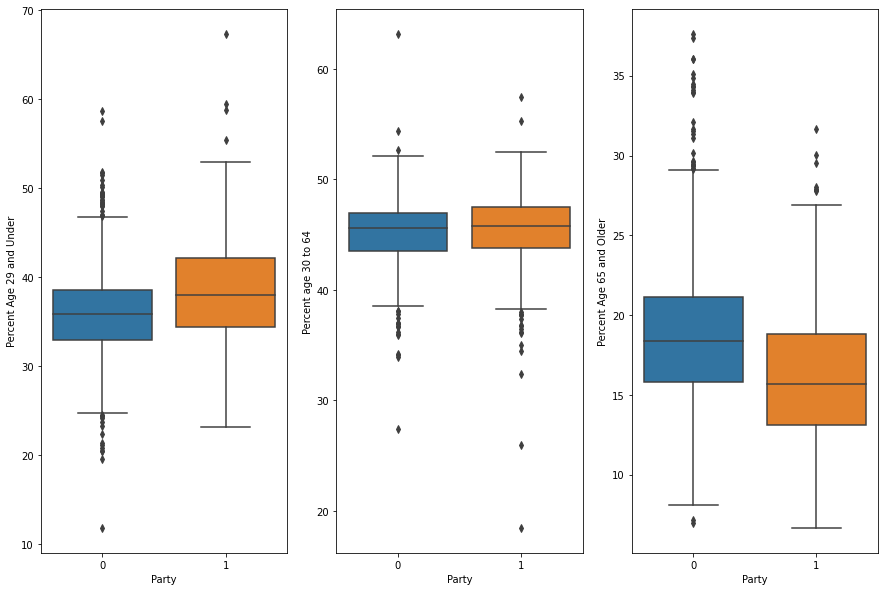

In [52]:
age_groups = ['Percent Age 29 and Under','Percent age 30 to 64','Percent Age 65 and Older']
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
for index,group in enumerate(age_groups):
    sns.boxplot(ax=axes[index], x="Party", y=group, data=merge_dataframe)

In [55]:
merge_dataframe.groupby(by=['Party'])['Percent Female','Percent Male'].describe()

<ipython-input-55-98c4a3903160>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_dataframe.groupby(by=['Party'])['Percent Female','Percent Male'].describe()


Percent Female                                                        \
               count       mean       std        min        25%        50%   
Party                                                                        
0              870.0  49.630898  2.429013  21.513413  49.222905  50.176792   
1              325.0  50.385433  2.149359  34.245291  49.854280  50.653830   

                            Percent Male                                  \
             75%        max        count       mean       std        min   
Party                                                                      
0      50.829770  55.885023        870.0  50.369102  2.429013  44.114977   
1      51.492075  56.418468        325.0  49.614567  2.149359  43.581532   

                                                   
             25%        50%        75%        max  
Party                                              
0      49.170230  49.823208  50.777095  78.486587  
1      48.507925  49.346170  50.145720  65.754709

In [68]:
merge_dataframe['Percent Male'] = 100 - merge_dataframe['Percent Female']

<ipython-input-68-71f82a87bc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_dataframe['Percent Male'] = 100 - merge_dataframe['Percent Female']


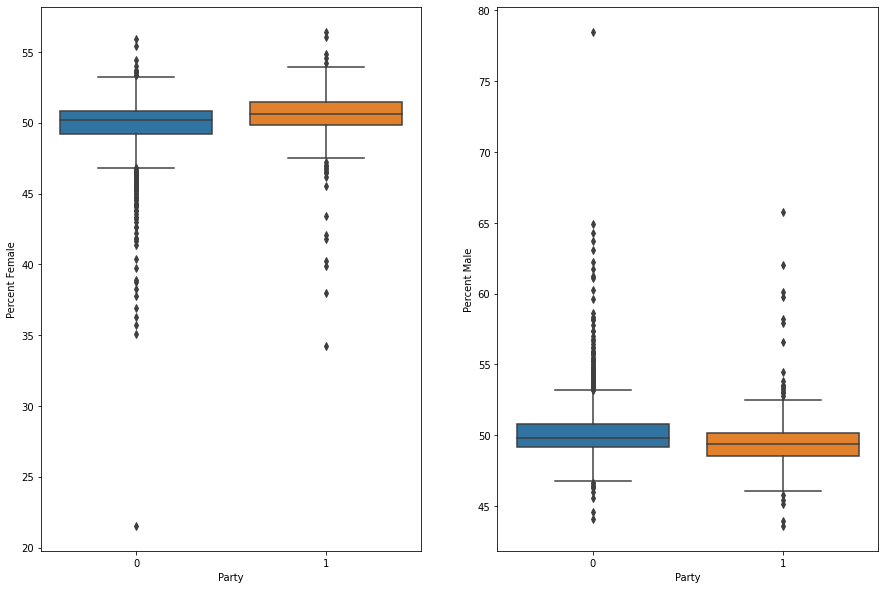

In [56]:
gender_groups = ['Percent Female','Percent Male']
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
for index,group in enumerate(gender_groups):
    sns.boxplot(ax=axes[index], x="Party", y=group, data=merge_dataframe)

In [58]:
merge_dataframe.groupby(by=['Party'])['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born'].describe().T

<ipython-input-58-a1e8bda2b265>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_dataframe.groupby(by=['Party'])['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born'].describe().T


Party                                                 0           1
Percent White, not Hispanic or Latino count  870.000000  325.000000
                                      mean    82.656646   69.683766
                                      std     16.056122   24.981502
                                      min     18.758977    2.776702
                                      25%     75.016397   53.271579
                                      50%     89.434849   77.786090
                                      75%     94.466596   90.300749
                                      max     99.627329   98.063495
Percent Black, not Hispanic or Latino count  870.000000  325.000000
                                      mean     4.189241    9.242649
                                      std      6.721695   13.351340
                                      min      0.000000    0.000000
                                      25%      0.460419    0.839103
                                      50%      1.318311    3.485992
                                      75%      4.753831   11.058843
                                      max     41.563041   63.953279
Percent Hispanic or Latino            count  870.000000  325.000000
                                      mean     9.733094   12.587391
                                      std     14.049576   19.575030
                                      min      0.000000    0.193349
                                      25%      1.704539    2.531017
                                      50%      3.427435    5.039747
                                      75%     10.709696   11.857116
                                      max     78.397012   95.479801
Percent Foreign Born                  count  870.000000  325.000000
                                      mean     3.990096    7.986330
                                      std      4.507786    8.330740
                                      min      0.000000    0.179769
                                      25%      1.320101    2.470508
                                      50%      2.326317    5.105490
                                      75%      5.149429   10.144555
                                      max     37.058317   52.229868

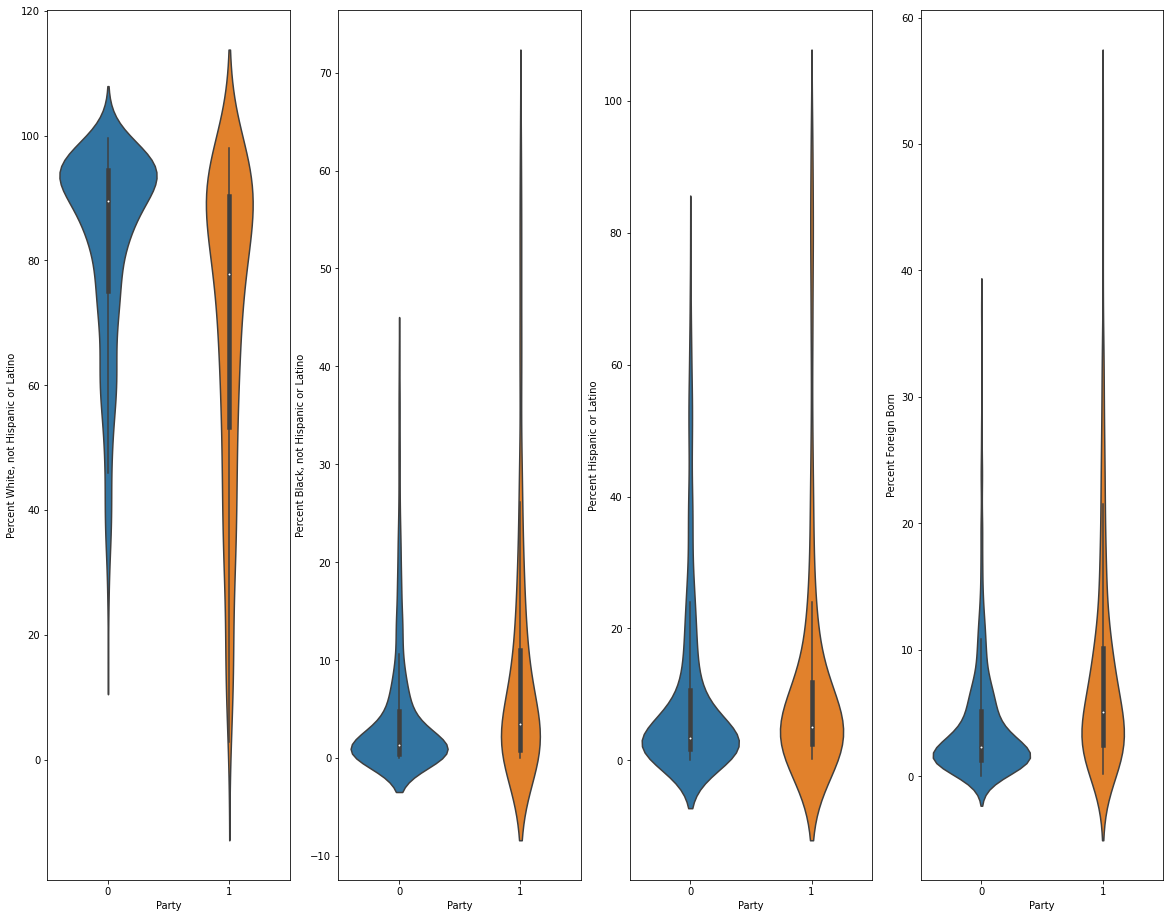

In [67]:
ethnicity_groups = ['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Percent Foreign Born']
fig, axes = plt.subplots(1, 4, figsize=(20, 16))
for index,group in enumerate(ethnicity_groups):
    sns.violinplot(ax=axes[index], x="Party", y=group, data=merge_dataframe)

In [62]:
ethnicity_groups = ['Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Bacherlor\'s Degree and higher']
merge_dataframe['Bacherlor\'s Degree and higher'] = 100 - merge_dataframe['Percent Less than Bachelor\'s Degree']
merge_dataframe.groupby(by=['Party'])['Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Bacherlor\'s Degree and higher'].describe().T

<ipython-input-62-3938638fd173>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_dataframe['Bacherlor\'s Degree and higher'] = 100 - merge_dataframe['Percent Less than Bachelor\'s Degree']
<ipython-input-62-3938638fd173>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge_dataframe.groupby(by=['Party'])['Percent Less than High School Degree', 'Percent Less than Bachelor\'s Degree', 'Bacherlor\'s Degree and higher'].describe().T


Party                                                0           1
Percent Less than High School Degree count  870.000000  325.000000
                                     mean    14.009112   11.883760
                                     std      6.303126    6.505613
                                     min      2.134454    3.215803
                                     25%      9.662491    7.893714
                                     50%     12.572435   10.370080
                                     75%     17.447168   13.637059
                                     max     47.812773   49.673777
Percent Less than Bachelor's Degree  count  870.000000  325.000000
                                     mean    81.095427   71.968225
                                     std      6.815537   11.192404
                                     min     43.419470   26.335440
                                     25%     78.108424   65.711800
                                     50%     82.406700   72.736143
                                     75%     85.546272   79.903653
                                     max     97.014925   94.849957
Bacherlor's Degree and higher        count  870.000000  325.000000
                                     mean    18.904573   28.031775
                                     std      6.815537   11.192404
                                     min      2.985075    5.150043
                                     25%     14.453728   20.096347
                                     50%     17.593300   27.263857
                                     75%     21.891576   34.288200
                                     max     56.580530   73.664560

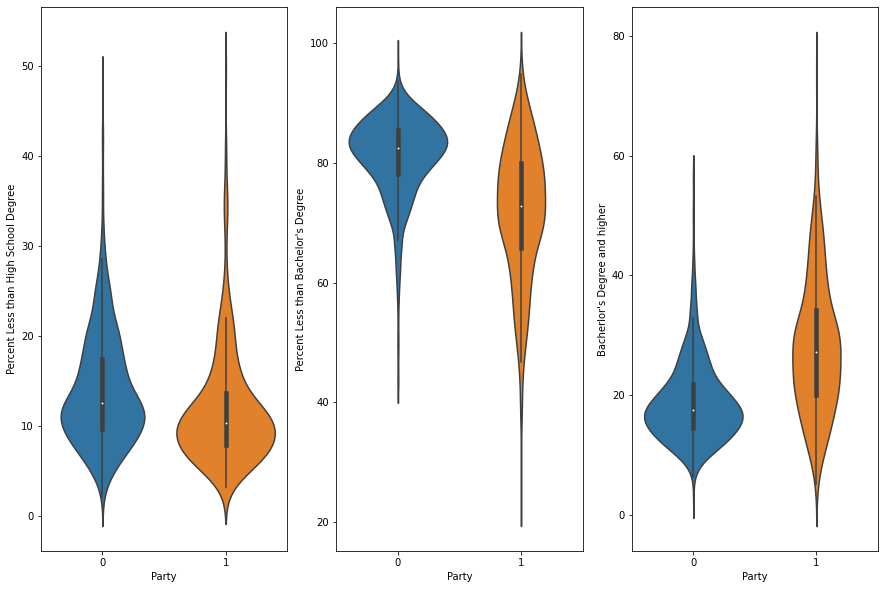

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
for index,group in enumerate(ethnicity_groups):
    sns.violinplot(ax=axes[index], x="Party", y=group, data=merge_dataframe)

#### Q9.  Based on your results for tasks 6-8, which variables in the dataset do you think are more important to determine whether a county is labeled as Democratic or Republican? Justify your answer.
Total population is one of the important variable to determine whether a county is Republican or Democratic because the mean population of democratic counties is a lot higher than the republican counties which means the higher total population counties are inclined towards Democrats.
Education level(Percent Less than Bachelors Degree) and Age(Percent Age 29 and Under,Percent Age 65 and Older) are also important variables because according to the plots the values of democrats and republicans in these variables vary a lot.

In [48]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    counties

In [ ]:
import plotly.express as px
fips = merge_dataframe['FIPS'].to_list()
values = merge_dataframe['Party']

fig = px.choropleth(merge_dataframe,geojson=counties,locations='FIPS',scope='usa',color='Party',color_continuous_scale=px.colors.sequential.Bluered[::-1])
fig.layout.template = None
fig.show()